# Problem statement:-

Energy analysis of building using different shapes:- To build a K-NN regression model for the prediction of heating and cooling load requirments of the building using the variable data
    
    there are 8 data attributes(columns):- X1 Relative compactness, X2 surface area, X3 wall area, X4 roof Area,X5 overall Height, X6 orientation, X7 Galzing area,and X8 Glazing area distribution

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [58]:


data = pd.read_csv("heatin_and_cooling_data.csv")

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [59]:
data.shape

(768, 10)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Y1:-is heating and Y2 :- cooling

In [61]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


let us separate the features (independent variables) and the target variables(dependent variable) in the data.

In [62]:
features=data.iloc[:,:-2]
predictions=data.iloc[:,-2:]#last two columns contains the target variable

In [63]:
features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [64]:
predictions.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


Feature Scaling:-
    1. normalization
    2. standardization

In [65]:
#perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#used to perform Standardization of the features
features_scaled=scaler.fit_transform(features)
features_scaled=pd.DataFrame(features_scaled, columns=features.columns)
features_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(features_scaled,predictions,test_size=0.2,random_state=42,shuffle=True)

# Perform Exploratory Data Analysis(EDA)

In [67]:
Train_data = pd.concat([X_train, y_train], axis = 'columns', #Join along the columns
                       names=[features.columns, predictions.columns])
Train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53,27.31
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90,22.09
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27,29.90
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84,32.71
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43,14.83


In [68]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      614 non-null    float64
 1   X2      614 non-null    float64
 2   X3      614 non-null    float64
 3   X4      614 non-null    float64
 4   X5      614 non-null    float64
 5   X6      614 non-null    float64
 6   X7      614 non-null    float64
 7   X8      614 non-null    float64
 8   Y1      614 non-null    float64
 9   Y2      614 non-null    float64
dtypes: float64(10)
memory usage: 52.8 KB


In [69]:
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033,24.410765
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280,9.476566
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000,10.900000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500,15.640000
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000,21.500000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000,32.920000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000,48.030000


# Box plot

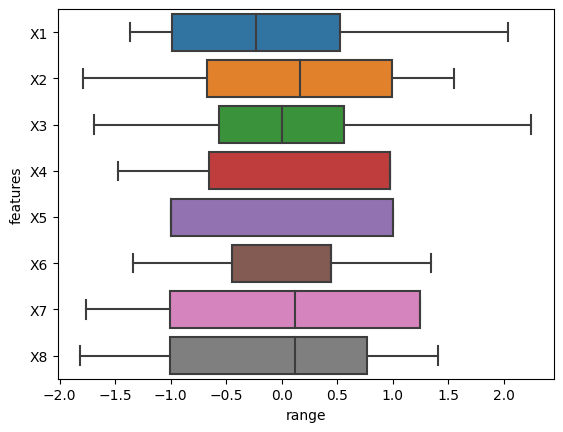

In [70]:
import seaborn as sns

sns.boxplot(data=X_train, orient='h').set(xlabel='range', ylabel='features')
plt.show()

# correlation Analysis

In [71]:
corr_mat=Train_data.corr(method="pearson")#pearson correlation is used
corr_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314,0.642148
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684,-0.679988
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092,0.410905
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294,-0.864714
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154,0.894927
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772,0.008773
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184,0.212642
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206,0.041308
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000,0.976316
Y2,0.642148,-0.679988,0.410905,-0.864714,0.894927,0.008773,0.212642,0.041308,0.976316,1.000000


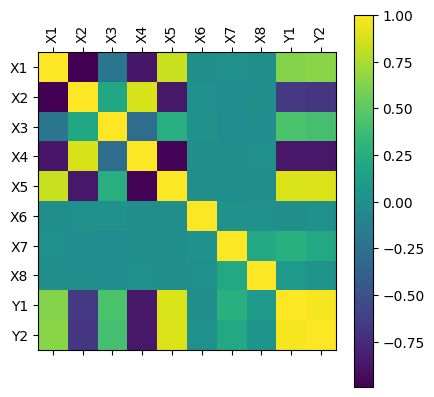

In [72]:
#visualize the correlation matrix

plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

*   X5 shows strong positive correlation with both the target variables.
*   X4 shows strong negative correlation with both the target variables.
*   X1 shows moderate positive correlation with both the target variables.
*   X2 shows moderate negative correlation with both the target variables.
*   X3 and X7 show weak positive correlation with both the target variables.
*   X6 and X8 show no correlation with both the target variables.

# visualizations

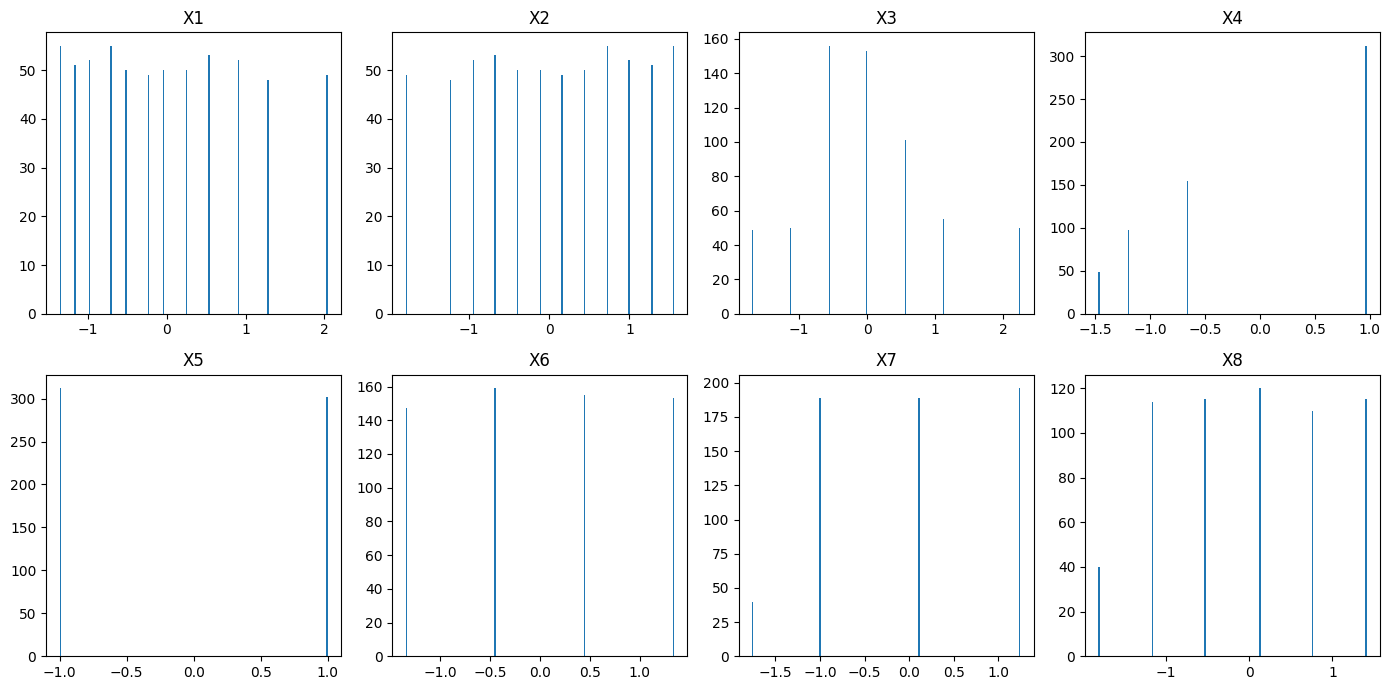

In [73]:
fig,axs=plt.subplots(2,4,figsize=(14,7))
axs=axs.flatten()

for i, col in enumerate(Train_data.columns[:-2]):
    axs[i].hist(Train_data[col],bins=200)
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [74]:
# calculate the number of unique values in each column
unique_values=Train_data.nunique()
print(unique_values)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
Y2    526
dtype: int64


visulize the distribution of the target variables.

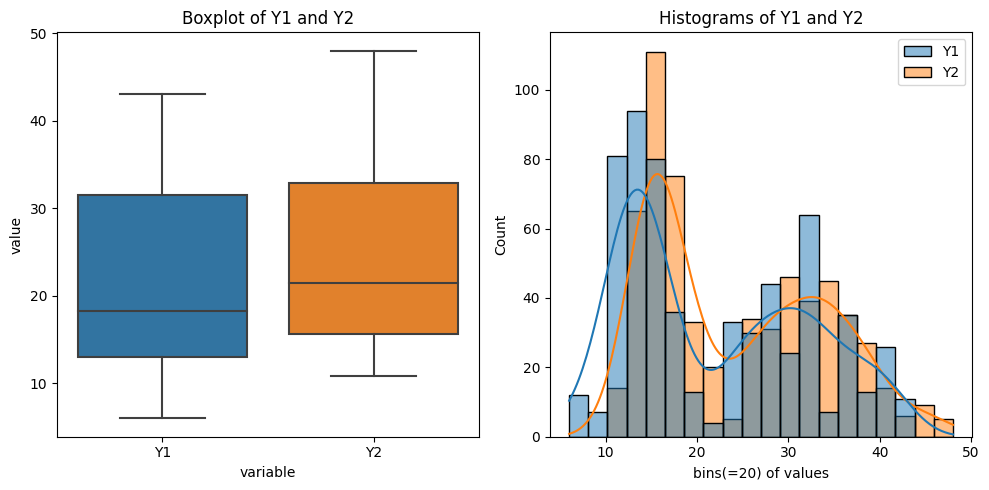

In [75]:
fig, axs=plt.subplots(1,2,figsize=(10,5))
axs=axs.flatten()

sns.boxplot(x='variable', y='value', data=pd.melt(Train_data[["Y1","Y2"]]), ax=axs[0])
axs[0].set_title("Boxplot of Y1 and Y2")

sns.histplot(data=Train_data[["Y1","Y2"]],ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histograms of Y1 and Y2")

plt.tight_layout()
plt.show()

Model Building: Training and testing

In [76]:
from sklearn.neighbors import KNeighborsRegressor
model=knn=KNeighborsRegressor(n_neighbors=7) #k=7

model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)#predictions on the training set
y_pred=model.predict(X_test)#predictions on the testing set

# Results and interpretation

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse_train=mean_squared_error(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

In [78]:
print("Evaluate metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared Score: ", r2_train)

Evaluate metrics: Train Data
Mean absolute error:  1.4883317822242907
Mean squared error:  4.873263079173042
R-squared Score:  0.948331263512322


check the evaluation metrics of the test data

In [79]:
mse_test=mean_squared_error(y_test,y_pred)
mae_test=mean_absolute_error(y_test,y_pred)
r2_test=r2_score(y_test,y_pred)


print("Evaluate metrics: Train Data")
print("Mean absolute error: ", mae_test)
print("Mean squared error: ", mse_test)
print("R-squared Score: ", r2_test)

Evaluate metrics: Train Data
Mean absolute error:  1.6206679035250466
Mean squared error:  6.21388498542274
R-squared Score:  0.9362372657412401


# improve result

we saw previously that features X6 and X8 show no correlation with either of the target variables. let us drop and re-train the model

In [80]:
X_train_new=X_train.drop(['X6','X8'],axis=1,inplace=False)
X_test_new=X_test.drop(['X6','X8'],axis=1,inplace=False)

In [89]:
X_train_new.head()

,X1,X2,X3,X4,X5,X7
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.009323
618,-1.174613,1.275625,0.561951,0.972512,-1.0,1.244049
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.117363
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.117363
231,-0.985413,0.997307,0.000000,0.972512,-1.0,-1.009323


In [90]:
X_test_new.head()

,X1,X2,X3,X4,X5,X7
668,-1.363812,1.553943,1.123903,0.972512,-1.0,1.244049
324,-0.985413,0.997307,0.000000,0.972512,-1.0,0.117363
624,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.244049
690,0.244383,-0.394284,0.561951,-0.655880,1.0,1.244049
473,-1.174613,1.275625,0.561951,0.972512,-1.0,0.117363


In [82]:
model_selected=knn=KNeighborsRegressor(n_neighbors=7)#k=7

model_selected.fit(X_train_new,y_train)
y_pred_train_selected=model_selected.predict(X_train_new)#prediction on the training set
y_pred_test_selected=model_selected.predict(X_test_new)

In [83]:
r2_train_new=r2_score(y_train, y_pred_train_selected)
print('Train r2 score after feature selection: ', r2_train_new)

r2_test_new=r2_score(y_test, y_pred_test_selected)
print('Test r2 score after feature selection: ', r2_test_new)

Train r2 score after feature selection:  0.9773864030583985
Test r2 score after feature selection:  0.9751364863170637


check new prediction....

In [92]:
print(model_selected.predict([[0.528182, -0.672602, 0.000000, -0.655880, 1.0, -1.009323]]))

[[23.69       26.18714286]]


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
